<a href="https://colab.research.google.com/github/almendruki/Cosas-TDA/blob/main/Almendra_Orellana_Figueroa_Tarea_1_An%C3%A1lisis_Topol%C3%B3gico_de_Datos_Reales_con_Reducci%C3%B3n_de_Dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1 para la Semana

## Proyecto: Análisis Topológico de Datos Reales con Reducción de Dimensiones

**Objetivo**: Aplicar los algoritmos implementados en clase a un dataset real, comparando el comportamiento topológico antes y después de reducción de dimensiones.

### Parte 1: Selección y Exploración del Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Ejemplo de datasets sugeridos (elige UNO)
from sklearn.datasets import load_breast_cancer
# Opción 3: Datos de cáncer de mama (30D → 2D)
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target
X_sample = X[:500]  # Tomar una muestra para eficiencia
y_sample = y[:500]


# Exploración inicial
print(f"Shape original: {X_sample.shape}")
print(f"Número de clases: {len(np.unique(y_sample))}")

Shape original: (500, 30)
Número de clases: 2


In [3]:
#visualización de algunas muestras
print("primeras 5 muestras del dataset orginal:")
display(X_sample.head())

primeras 5 muestras del dataset orginal:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


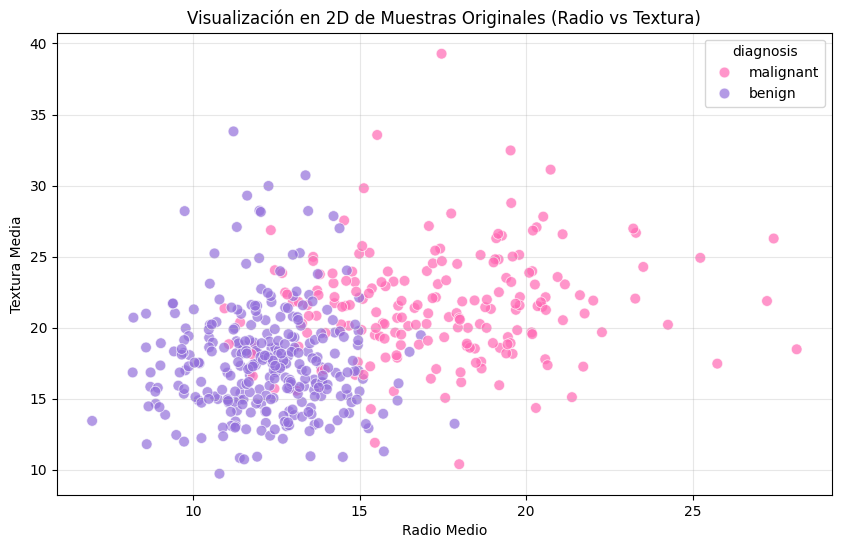

In [4]:
# 2. Preparar los datos para el gráfico
# Unimos temporalmente las características con sus etiquetas (benigno/maligno)
df_viz = X_sample.copy()
df_viz['target'] = y_sample
# Convertimos los números (0 y 1) a sus nombres reales para que la leyenda se lea bien
df_viz['diagnosis'] = df_viz['target'].map({0: 'malignant', 1: 'benign'})# 3. Gráfico de dispersión (Scatter Plot) de dos características clave
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_viz,
    x='mean radius',     # Característica 1: Radio Medio
    y='mean texture',    # Característica 2: Textura Media
    hue='diagnosis',     # Colorear según diagnóstico
    palette={'malignant': '#FF69B4', 'benign': '#9370DB'}, # Tonos rosados y morados
    alpha=0.7,
    s=60
)
plt.title('Visualización en 2D de Muestras Originales (Radio vs Textura)')
plt.xlabel('Radio Medio')
plt.ylabel('Textura Media')
plt.grid(True, alpha=0.3)
plt.show()

Breve Descripción del Dataset

El Breast Cancer Wisconsin Dataset contiene características extraídas a partir de imágenes digitalizadas de biopsias (Aspiración con Aguja Fina) de masas mamarias.

Características (Features): Tiene 30 dimensiones numéricas. Se calculan 10 métricas del núcleo de las células (como el radio, textura, perímetro, área, suavidad, compacidad, etc.). Para cada una de estas 10 métricas, se calcula la media, el error estándar y el "peor" valor (el más grande), resultando en 10×3=30 variables.

Objetivo (Target): Es un problema de clasificación binaria donde cada paciente es diagnosticado como Maligno o Benigno.

¿Por qué es interesante para el Análisis Topológico (TDA)?

Analizar este dataset con TDA (por ejemplo, usando algoritmos como Mapper o Homología Persistente) es muy interesante por tres razones principales:

1. Revela la forma continua de la enfermedad (Transiciones)

Con métodos tradicionales (como la regresión logística o un árbol de decisión), forzamos a los datos a dividirse rígidamente en dos cajas: "Benigno" o "Maligno". Sin embargo, biológicamente, el cáncer es un proceso evolutivo continuo. El TDA no fuerza cortes abruptos, sino que conecta los puntos, permitiendo visualizar las "rutas" o puentes de transición de células sanas hacia diferentes niveles de malignidad.

2. Descubrimiento de Sub-fenotipos (Ramificaciones / "Flares")

Cuando aplicas el algoritmo Mapper a conjuntos de datos de cáncer como este, es muy común que el grafo resultante tenga forma de "Y" o de estrella.

Un extremo agrupa los casos benignos.

Los otros "brazos" (flares) separan a los pacientes malignos en diferentes subgrupos con características biométricas distintas (por ejemplo, tumores pequeños pero muy irregulares, frente a tumores grandes pero de bordes suaves). El TDA descubre estas sub-poblaciones ocultas sin que se lo indiquemos previamente.

3. Manejo de Alta Dimensionalidad y Ruido

Como mostraste en tu código de matplotlib, solo podemos ver 2 variables a la vez (Radio vs Textura). Incluso usando PCA para reducir a 2D o 3D, perdemos mucha información valiosa. El TDA, en cambio, extrae las características geométricas globales del espacio original de 30 dimensiones. Al basarse en la forma y conectividad en lugar de distancias rígidas, es muy robusto frente al ruido inherente de las mediciones médicas.

### Parte 2: Análisis Topológico en Alta Dimensión

In [5]:
# 1. Aplicar el calculo de componentes conectadas y ciclos al dataset original
# 2. Usar solo una muestra representativa (200-500 puntos) por eficiencia
# 3. Generar al menos 10 valores de epsilon
# 4. Registrar:
#    - Número de componentes conectadas vs epsilon
#    - Número de ciclos vs epsilon
#    - Tiempo de ejecución de tus algoritmos

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

def calcular_matriz_distancias(X):
    return squareform(pdist(X, metric='euclidean'))

def generar_epsilons(D, k=15):
    # Generamos los epsilons basados en la distribución real de distancias
    dists = D[np.triu_indices_from(D, k=1)]
    eps_min = np.percentile(dists, 5)
    eps_max = np.percentile(dists, 70)
    return np.linspace(eps_min, eps_max, k)

def analizar_tda(X, epsilons, nombre="Datos"):
    D = calcular_matriz_distancias(X)
    n = len(X)
    resultados = []

    for eps in epsilons:
        t0 = time.time()

        # Construir Grafo
        G = nx.Graph()
        G.add_nodes_from(range(n))
        indices = np.where((D <= eps) & (D > 0))
        aristas = [(i, j) for i, j in zip(indices[0], indices[1]) if i < j]
        G.add_edges_from(aristas)

        # Extraer características topológicas
        n_comp = nx.number_connected_components(G)
        n_aristas = G.number_of_edges()
        n_ciclos = max(0, n_aristas - n + n_comp) # Euler aproximado

        t1 = time.time()
        resultados.append({
            'epsilon': eps,
            'componentes': n_comp,
            'ciclos': n_ciclos,
            'tiempo': t1 - t0
        })
    return pd.DataFrame(resultados)

In [6]:
# Estandarizamos los datos para que el TDA y el PCA sean precisos
scaler = StandardScaler()
X_std = scaler.fit_transform(X_sample)

# Generamos el rango de epsilons de referencia usando la Alta Dimensión
D_ref = calcular_matriz_distancias(X_std)
epsilons_comunes = generar_epsilons(D_ref, k=15)
print(f"\nRango de Epsilon calculado: {epsilons_comunes[0]:.2f} a {epsilons_comunes[-1]:.2f}\n")
print(epsilons_comunes)


Rango de Epsilon calculado: 2.98 a 8.13

[2.97623927 3.34414919 3.71205911 4.07996902 4.44787894 4.81578886
 5.18369877 5.55160869 5.91951861 6.28742852 6.65533844 7.02324836
 7.39115828 7.75906819 8.12697811]


In [7]:
print("=== PARTE 2: ANÁLISIS EN ALTA DIMENSIÓN ===")
df_high = analizar_tda(X_std, epsilons_comunes, nombre="Alta Dimensión (30D)")

=== PARTE 2: ANÁLISIS EN ALTA DIMENSIÓN ===


In [9]:
print(df_high)

     epsilon  componentes  ciclos    tiempo
0   2.976239          101    5839  0.017566
1   3.344149           69   10060  0.024750
2   3.712059           54   15075  0.035553
3   4.079969           36   20948  0.046854
4   4.447879           28   27490  0.061782
5   4.815789           26   34394  0.082955
6   5.183699           20   41239  0.096166
7   5.551609           15   47909  0.110834
8   5.919519           13   54261  0.144228
9   6.287429           11   60241  0.133240
10  6.655338           11   66115  0.149054
11  7.023248            9   71664  0.150923
12  7.391158            8   77021  0.155976
13  7.759068            7   82179  0.171438
14  8.126978            6   86831  0.175769


## Parte 3: Reducción de dimensiones

In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time

# PCA a 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# t-SNE a 2D (opcional, para comparar)
# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(X_sample)
print(f"Datos reducidos a Shape: {X_pca.shape}")
print(f"Varianza explicada por PCA: {pca.explained_variance_ratio_.sum():.3f}")

Datos reducidos a Shape: (500, 2)
Varianza explicada por PCA: 0.632


In [15]:
print("primeras 5 muestras del dataset pca:")
print(X_pca)

primeras 5 muestras del dataset pca:
[[ 9.05232899e+00  1.87405839e+00]
 [ 2.26835419e+00 -3.77354481e+00]
 [ 5.63260672e+00 -1.13714339e+00]
 [ 7.18820317e+00  1.01236364e+01]
 [ 3.81245060e+00 -1.94912562e+00]
 [ 2.37002040e+00  3.90106048e+00]
 [ 2.15230008e+00 -2.71321433e+00]
 [ 2.14923534e+00  2.31213180e+00]
 [ 3.17570288e+00  3.33356242e+00]
 [ 6.39147668e+00  7.56823107e+00]
 [-8.61078121e-01 -2.60500414e+00]
 [ 2.56626561e+00  4.99264363e-02]
 [ 8.11521497e+00  2.78994947e+00]
 [ 2.80305657e-01 -8.94149258e-01]
 [ 4.33910547e+00  4.77689544e+00]
 [ 4.08363989e+00  2.87295316e+00]
 [ 1.83963070e-01 -1.52774751e+00]
 [ 4.40405745e+00  1.32665749e+00]
 [ 4.84631178e+00 -4.16529867e+00]
 [-1.30753985e+00 -1.21560788e-01]
 [-1.63099259e+00  6.43054504e-01]
 [-3.59746087e+00  1.82019565e+00]
 [ 4.63059921e+00  3.30101783e+00]
 [ 4.11902567e+00 -5.19715357e+00]
 [ 4.88868882e+00 -1.64037626e+00]
 [ 7.00581579e+00  1.95863262e+00]
 [ 3.47690202e+00  2.10451092e+00]
 [ 2.99456165e+00 

### Parte 4: Análisis Topológico de daatos en baja dimensión

In [12]:
# Aplicar los mismos algoritmos a los datos reducidos
# Comparar:
# - ¿Cambia el número de componentes conectadas?
# - ¿Se preservan los ciclos principales?
# - ¿Es más rápido el análisis?

print("=== PARTE 4: ANÁLISIS EN BAJA DIMENSIÓN ===")
df_low = analizar_tda(X_pca, epsilons_comunes, nombre="Baja Dimensión (2D PCA)")

=== PARTE 4: ANÁLISIS EN BAJA DIMENSIÓN ===


In [16]:
print(df_low)

     epsilon  componentes  ciclos    tiempo
0   2.976239            4   38021  0.185061
1   3.344149            2   44043  0.218066
2   3.712059            2   49883  0.214822
3   4.079969            1   55446  0.213251
4   4.447879            1   60775  0.285019
5   4.815789            1   65788  0.253359
6   5.183699            1   70624  0.269014
7   5.551609            1   75209  0.143671
8   5.919519            1   79661  0.150824
9   6.287429            1   84009  0.184246
10  6.655338            1   88225  0.158113
11  7.023248            1   92254  0.165462
12  7.391158            1   95947  0.175375
13  7.759068            1   99343  0.182597
14  8.126978            1  102462  0.184832


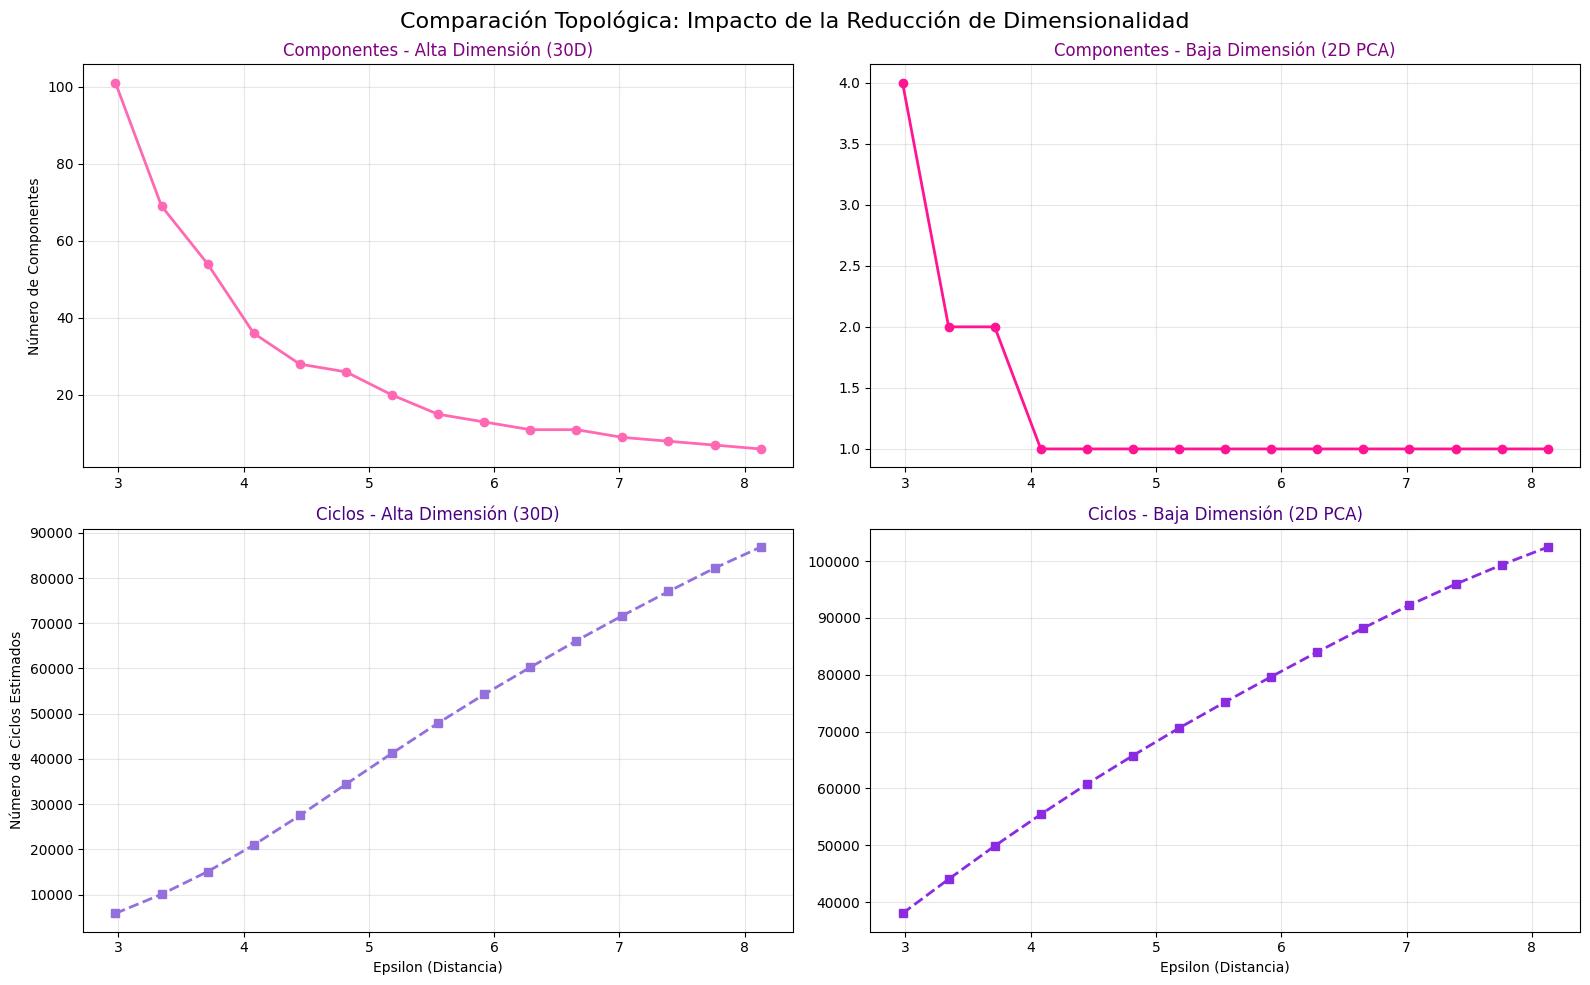


Resumen de la evolución topológica:


,Epsilon,Comp_30D,Comp_2D,Ciclos_30D,Ciclos_2D
0,2.98,101,4,5839,38021
1,3.34,69,2,10060,44043
2,3.71,54,2,15075,49883
3,4.08,36,1,20948,55446
4,4.45,28,1,27490,60775
5,4.82,26,1,34394,65788


In [18]:
#comparativa final
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# --- FILA 1: COMPONENTES ---
ax1.plot(df_high['epsilon'], df_high['componentes'], 'o-', color='#FF69B4', lw=2, label='30D')
ax1.set_title('Componentes - Alta Dimensión (30D)', fontsize=12, color='#800080')
ax1.set_ylabel('Número de Componentes')
ax1.grid(True, alpha=0.3)

ax2.plot(df_low['epsilon'], df_low['componentes'], 'o-', color='#FF1493', lw=2, label='2D')
ax2.set_title('Componentes - Baja Dimensión (2D PCA)', fontsize=12, color='#800080')
ax2.grid(True, alpha=0.3)

# --- FILA 2: CICLOS ---
ax3.plot(df_high['epsilon'], df_high['ciclos'], 's--', color='#9370DB', lw=2, label='30D')
ax3.set_title('Ciclos - Alta Dimensión (30D)', fontsize=12, color='#4B0082')
ax3.set_xlabel('Epsilon (Distancia)')
ax3.set_ylabel('Número de Ciclos Estimados')
ax3.grid(True, alpha=0.3)

ax4.plot(df_low['epsilon'], df_low['ciclos'], 's--', color='#8A2BE2', lw=2, label='2D')
ax4.set_title('Ciclos - Baja Dimensión (2D PCA)', fontsize=12, color='#4B0082')
ax4.set_xlabel('Epsilon (Distancia)')
ax4.grid(True, alpha=0.3)

plt.suptitle('Comparación Topológica: Impacto de la Reducción de Dimensionalidad', fontsize=16)
plt.tight_layout()
plt.show()

# Mostrar la tabla final unida para fácil lectura
df_final = pd.DataFrame({
    'Epsilon': epsilons_comunes.round(2),
    'Comp_30D': df_high['componentes'],
    'Comp_2D': df_low['componentes'],
    'Ciclos_30D': df_high['ciclos'],
    'Ciclos_2D': df_low['ciclos']
})
print("\nResumen de la evolución topológica:")
display(df_final.head(6))

### Entregables (en un Jupyter Notebook)

#### 1. **Análisis Exploratorio** (30%)
- Descripción del dataset elegido
- Visualización de algunas muestras
- Justificación de por qué es interesante para análisis topológico

#### 3. **Experimento Comparativo** (35%)
- Gráficos lado a lado: componentes y ciclos en alta vs baja dimensión
- Análisis de tiempo de ejecución
- Tabla comparativa de resultados

#### 4. **Reflexión y Conclusiones** (35%)
- ¿Qué estructuras topológicas se preservan tras la reducción?
- ¿Qué se pierde y qué se gana?
- ¿Cuándo recomendarías usar datos originales vs reducidos?

#### 5 ( Bonus). **Implementación Algorítmica** (+10)
- Implemente algoritmos en grafos para hallar las componentes conectadas y ciclos utilizando la estructura Union-Find.
- Análisis de complejidad temporal observada
- Código limpio y bien comentado

### Preguntas Guía para la Reflexión

1. **Preservación topológica**: ¿Las componentes conectadas principales se mantienen después de PCA?

2. **Aparición de ciclos**: ¿Aparecen ciclos "artificiales" debido a la proyección? ¿Desaparecen ciclos reales?

3. **Eficiencia computacional**: ¿Cuánto se acelera el análisis en baja dimensión?

4. **Interpretabilidad**: ¿Es más fácil entender los resultados en 2D?

5. **Robustez**: ¿Los patrones topológicos son estables ante pequeños cambios en los parámetros?

### Criterios de Evaluación

- **Correctitud técnica**: Implementación correcta de los algoritmos
- **Calidad del análisis**: Profundidad en la comparación antes/después
- **Claridad de presentación**: Gráficos informativos y explicaciones claras
- **Pensamiento crítico**: Reflexiones fundamentadas sobre los resultados

### Recursos Adicionales

In [ ]:
# Función auxiliar para medir tiempo
def medir_tiempo_analisis(X, D, epsilons):
    start_time = time.time()
    num_comp, _ = analizar_componentes_todas_escalas(X, D, epsilons)
    info_ciclos = analizar_ciclos_todas_escalas(X, D, epsilons)
    end_time = time.time()
    return end_time - start_time, num_comp, info_ciclos

# Sugerencia para visualización
def comparar_resultados_dimensiones(resultado_alta_dim, resultado_baja_dim, epsilons):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    # Componentes en alta dimensión
    ax1.plot(epsilons, resultado_alta_dim['componentes'], 'bo-')
    ax1.set_title('Componentes - Alta Dimensión')
    ax1.set_ylabel('Número de Componentes')

    # Componentes en baja dimensión
    ax2.plot(epsilons, resultado_baja_dim['componentes'], 'ro-')
    ax2.set_title('Componentes - Baja Dimensión')

    # Ciclos en alta dimensión
    ax3.plot(epsilons, resultado_alta_dim['ciclos'], 'bo-')
    ax3.set_title('Ciclos - Alta Dimensión')
    ax3.set_xlabel('Epsilon')
    ax3.set_ylabel('Número de Ciclos')

    # Ciclos en baja dimensión
    ax4.plot(epsilons, resultado_baja_dim['ciclos'], 'ro-')
    ax4.set_title('Ciclos - Baja Dimensión')
    ax4.set_xlabel('Epsilon')

    plt.tight_layout()
    return fig

**Fecha de entrega**: Una semana después de la clase  
**Formato**: Jupyter Notebook (.ipynb) + PDF exportado  